# Project 1, Part 3, Executive Questions: Product Specific Questions

University of California, Berkeley
Master of Information and Data Science (MIDS) program
w205 - Fundamentals of Data Engineering

Student: PRAKASH KRISHNAN

Year: 2021-2022

Semester: SPRING 2022

Section: WBL 011


# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import psycopg2

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  Remember you can use any code from the labs.

In [2]:
#
# function to run a select query and return rows in a pandas dataframe
# pandas puts all numeric values from postgres to float
# if it will fit in an integer, change it to integer
#

def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)

# Connect to the Postgres database¶
connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

# Create a cursor for the connection
cursor = connection.cursor()


# Format float displays in a dataframe
pd.options.display.float_format = '{:,.2f}'.format

# Instructions for Specific Questions

For each specific quesion, you must write 1 and only 1 query that answers that specific question.  The results of your query must be displayed in a Pandas dataframe as demonstrated in the labs

All output should be sorted.

For store name, use the city name the store is located in.

When sorting by store name, sort in alphabetical order.

For meal name, use the product description.

When sorting by meal name, sort in alphabetical order.

For month, use the full month name: January, February, March, etc.

When sorting by month, sort in calendar order: January, February, March, etc.  You may find it useful to include a month number to help with the sort.  It's ok to leave it in the output.

For day of week, use the full day of week name: Sunday, Monday, Tuesday, etc.

When sorting by day of week, sort in day of week order: Sunday, Monday, Tuesday, etc. You may find it usefule to include a day of week number to help with the sort.  It's ok to leave it in the output.


# 1.3.1 How many meals were purchased for all of AGM?

In [3]:
# Query to determine how many meals purchased by all of AGM

# This is a table level summary of line_items

rollback_before_flag = True
rollback_after_flag = True

query = """

select sum(quantity) as number_of_meals
from
line_items

"""
my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,number_of_meals
0,8228284


# 1.3.2 How many meals were purchased for all of AGM by meal?

Sort by meal name in alphabetical order

In [4]:
# Query to determine how many meals purchased by meal

# This is a table join between line_items and products

rollback_before_flag = True
rollback_after_flag = True

query = """

select products.description as meal, sum(quantity) as number_of_meals from line_items
join products
  on line_items.product_id = products.product_id
group by products.description
order by products.description

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,meal,number_of_meals
0,Brocolli Stir Fry,913984
1,Chicken Salad,228561
2,Curry Chicken,1368884
3,Eggplant Lasagna,1599058
4,Pistachio Salmon,1828778
5,Spinach Orzo,456769
6,Teriyaki Chicken,1145013
7,Tilapia Piccata,687237


# 1.3.3 How many meals were purchased by store and by meal?

Sort by store name in alphabetical order, then by meal name in alphabetical order

In [5]:
# Query to determine how many meals purchased by store and meal

# This is a table join between sales, line_items, products and stores


rollback_before_flag = True
rollback_after_flag = True

query = """

select stores.city as store_name, products.description as meal, sum(quantity) as number_of_meals from line_items
join products
  on line_items.product_id = products.product_id
join sales
  on sales.sale_id = line_items.sale_id and sales.store_id = line_items.store_id
join stores
  on stores.store_id = sales.store_id
group by stores.city, products.description
order by stores.city, products.description

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store_name,meal,number_of_meals
0,Berkeley,Brocolli Stir Fry,232038
1,Berkeley,Chicken Salad,57719
2,Berkeley,Curry Chicken,346508
3,Berkeley,Eggplant Lasagna,405637
4,Berkeley,Pistachio Salmon,464274
5,Berkeley,Spinach Orzo,115469
6,Berkeley,Teriyaki Chicken,290858
7,Berkeley,Tilapia Piccata,174252
8,Dallas,Brocolli Stir Fry,179885
9,Dallas,Chicken Salad,44756


# 1.3.4 How many meals were purchased by month?

Sort by month in calendar order

In [6]:
# Query to determine how many meals purchased by month

# This is a table join between sales, line_items and products

rollback_before_flag = True
rollback_after_flag = True

query = """

select extract(month from sales.sale_date) as month_number,
       to_char(sales.sale_date, 'Month') as month_name,
       sum(quantity) as number_of_meals
from line_items
join products
  on line_items.product_id = products.product_id
join sales
  on sales.sale_id = line_items.sale_id and sales.store_id = line_items.store_id

group by month_number, month_name
order by month_number

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag).loc[:,['month_name','number_of_meals']]

,month_name,number_of_meals
0,January,650319
1,February,631190
2,March,731635
3,April,687607
4,May,664820
5,June,677009
6,July,666087
7,August,752484
8,September,631580
9,October,741259


# 1.3.5 How many meals were purchased by month and meal?

Sort by month in calendar order, then by meal name in alphabetical order

In [7]:
# Query to determine how many meals purchase by month and meal

# This is a table join between sales, line_items and products

rollback_before_flag = True
rollback_after_flag = True

query = """

select extract(month from sales.sale_date) as month_number,
       to_char(sales.sale_date, 'Month') as month_name,
       products.description as meal,
       sum(quantity) as number_of_meals
from line_items
join products
  on line_items.product_id = products.product_id
join sales
  on sales.sale_id = line_items.sale_id and sales.store_id = line_items.store_id

group by month_number, month_name, products.description
order by month_number, month_name, products.description

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag).loc[:,['month_name','meal','number_of_meals']]

,month_name,meal,number_of_meals
0,January,Brocolli Stir Fry,72161
1,January,Chicken Salad,18003
2,January,Curry Chicken,108134
3,January,Eggplant Lasagna,126605
4,January,Pistachio Salmon,144053
...,...,...,...
91,December,Eggplant Lasagna,134666
92,December,Pistachio Salmon,154242
93,December,Spinach Orzo,38297
94,December,Teriyaki Chicken,96896


# 1.3.6 How many meals were purchased by day of week and meal?

Sort by day of week in day of week order, then by meal name in alphabetical order

In [8]:
# Query to determine how many meals purchase by day of week and meal

# This is a table join between sales, line_items and products

rollback_before_flag = True
rollback_after_flag = True

query = """

select extract(dow from sales.sale_date) as dow,
       to_char(sales.sale_date, 'Day') as day_of_week,
       products.description as meal,
       sum(quantity) as number_of_meals
from line_items
join products
  on line_items.product_id = products.product_id
join sales
  on sales.sale_id = line_items.sale_id and sales.store_id = line_items.store_id

group by dow, day_of_week, products.description
order by dow, day_of_week, products.description

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag).loc[:,['day_of_week','meal','number_of_meals']]

,day_of_week,meal,number_of_meals
0,Sunday,Brocolli Stir Fry,172250
1,Sunday,Chicken Salad,43110
2,Sunday,Curry Chicken,257216
3,Sunday,Eggplant Lasagna,301726
4,Sunday,Pistachio Salmon,344315
5,Sunday,Spinach Orzo,85968
6,Sunday,Teriyaki Chicken,215741
7,Sunday,Tilapia Piccata,128763
8,Monday,Brocolli Stir Fry,121717
9,Monday,Chicken Salad,30790


# 1.3.7 Average number of meals per sale for all of AGM


In [9]:
# Query to determine Average number of meals per sale for all AGM

# First a inner query of line_items to summarize quantity sold for each distinct sale_id
# Outer querty then computes the average


rollback_before_flag = True
rollback_after_flag = True

query = """

select avg(temp_tbl.numb_meals) as avg_numb_of_meals
from

(select line_items.store_id, line_items.sale_id, sum(line_items.quantity) as numb_meals
from line_items 
group by line_items.sale_id, line_items.store_id) as temp_tbl

"""
my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,avg_numb_of_meals
0,5.35


# 1.3.8 Average number of meals per sale by store

Sort by store name in alphabetical order


In [10]:
# Query to determine Average number of meals per sale by store

# First a inner query of line_items to summarize quantity sold for each sale_id and store_id
# Then a join with stores, sales tables

rollback_before_flag = True
rollback_after_flag = True

query = """

select stores.city, avg(temp_tbl.numb_meals) as avg_numb_of_meals from stores

join sales
on stores.store_id = sales.store_id

join (select line_items.store_id, line_items.sale_id, sum(line_items.quantity) as numb_meals 
from line_items 
group by line_items.sale_id, line_items.store_id) as temp_tbl

on sales.sale_id = temp_tbl.sale_id and sales.store_id = temp_tbl.store_id

group by stores.city
order by stores.city asc

"""
my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,city,avg_numb_of_meals
0,Berkeley,5.35
1,Dallas,5.35
2,Miami,5.36
3,Nashville,5.33
4,Seattle,5.36


# 1.3.9 The Executives have also asked you to provide your best example of a data visualization for one of the above queries

You may choose any one of the above queries. 

It's best to select the one that you think will provide the most interesting data visualization.  

You are allowed to add a pivot as demonstrated in the labs if it is needed for your data visualization. 

In [11]:
# Query to determine how many meals purchased by store and meal

# This is a table join between sales, line_items, products and stores


rollback_before_flag = True
rollback_after_flag = True

query = """

select stores.city as store_name, products.description as meal, sum(line_items.quantity) as number_of_meals from line_items
join products
  on line_items.product_id = products.product_id
join sales
  on sales.sale_id = line_items.sale_id and sales.store_id = line_items.store_id
join stores
  on stores.store_id = sales.store_id
group by stores.city, products.description
order by stores.city, products.description

"""
df1=my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

In [12]:
# create a cross-tab in Pandas for Data Visualization
pivoted = df1.pivot(index='store_name', columns='meal', values='number_of_meals')\
            .reset_index()
pivoted.columns.name=None
pivoted=pivoted.set_index('store_name')
df = pivoted

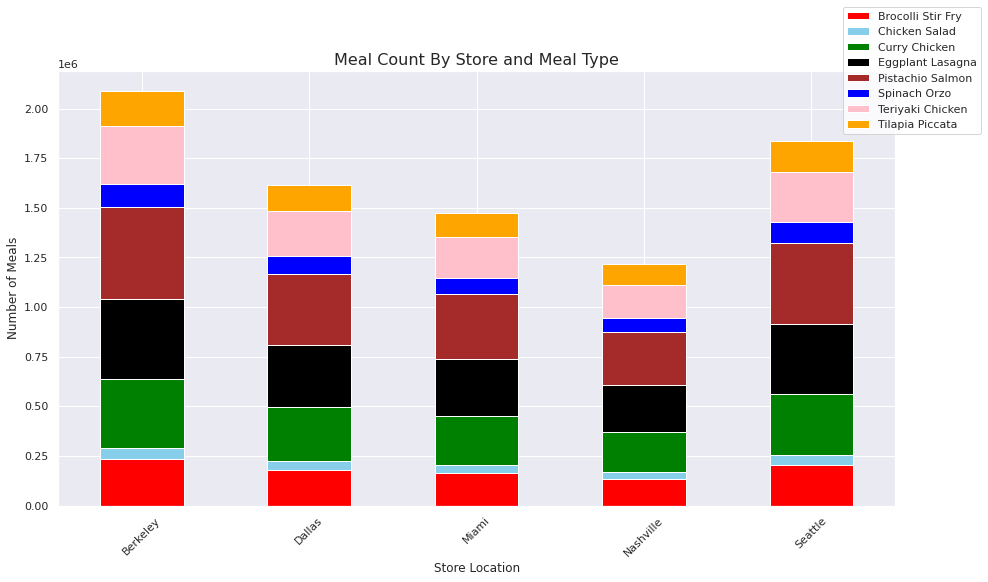

In [14]:
# create plot size
sns.set(rc={"figure.figsize":(15, 8)})
  
# create stacked bar chart 
df.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green','black','brown','blue','pink','orange'])

#set style
sns.set(style='white')

#add overall title
plt.title('Meal Count By Store and Meal Type', fontsize=16)

#add axis titles
plt.xlabel('Store Location')
plt.ylabel('Number of Meals')

#plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.02, 1), loc='center', borderaxespad=0)

#rotate x-axis labels
plt.xticks(rotation=45)

plt.show()